In [1]:
import sys
#sys.path.insert(1, '/home/user/Research/base-WingWatch')
sys.path.insert(1, '/home/main/Research/WingWatch')

In [2]:
from WingWatch.Equipment import station
from WingWatch.Equipment import antenna
from WingWatch.Intersections import montecarlo
from WingWatch.Tools import translation
import pandas as pd
import numpy as np



In [3]:
#Setup each of the actual stations




BRR_Station = station.Station('BRR',41.1479, -71.5901)
BRR_Comp_Data = pd.read_csv('Fake_Calibration_Data.csv')


SEL_pos = translation.convert_back_to_lla([0,-200,0],BRR_Station.lat,BRR_Station.long,BRR_Station.alt)
TUR_pos = translation.convert_back_to_lla([100*np.sqrt(3),-100,0],BRR_Station.lat,BRR_Station.long,BRR_Station.alt)

a1 = antenna.Antenna('1','test',0,434)
a1.assign_pattern(BRR_Comp_Data)
BRR_Station.add_antenna(a1)

SEL_Station = station.Station('SEL',SEL_pos[0], SEL_pos[1])
SEL_Comp_Data = pd.read_csv('Fake_Calibration_Data.csv')

a1 = antenna.Antenna('1','test',0,434)
a1.assign_pattern(SEL_Comp_Data)
a1.convert_to_lat_long(SEL_Station)
SEL_Station.add_antenna(a1)


TUR_Station = station.Station('TUR',TUR_pos[0], TUR_pos[1])
TUR_Comp_Data = pd.read_csv('Fake_Calibration_Data.csv')


a1 = antenna.Antenna('1','test',0,434)
a1.assign_pattern(TUR_Comp_Data)
a1.convert_to_lat_long(TUR_Station)

TUR_Station.add_antenna(a1)


1 added to BRR's antennas.
1 added to SEL's antennas.
1 added to TUR's antennas.


In [4]:
data_BR = [[1,-92]]
data_SEL = [[1,-98]]
data_BIT = [[1,-81]]


data_to_send_through = [[data_BR,BRR_Station],[data_SEL,SEL_Station],[data_BIT,TUR_Station]]

In [5]:
points,index_map,station_shells = montecarlo.montecarlo_intersection(data_to_send_through,test=1)

In [6]:
import matplotlib.pyplot as plt

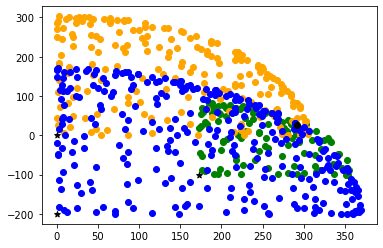

In [7]:
plt.scatter(station_shells[-1][:,0],station_shells[-1][:,1],color='green')
plt.scatter(station_shells[0][:,0],station_shells[0][:,1],color='orange')
plt.scatter(station_shells[1][:,0],station_shells[1][:,1],color='blue')
plt.scatter(0,0,marker='*',color='black',label='Station')
plt.scatter(0,-200,marker='*',color='black',label='Station')
plt.scatter(100*np.sqrt(3),-100,marker='*',color='black',label='Station')


plt.scatter(292,26,color="black",label='GPS Detection')

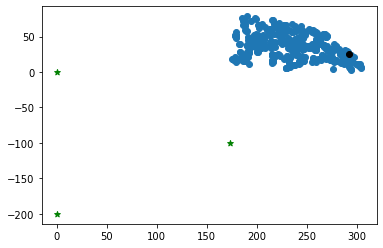

In [8]:
plt.scatter(points[index_map][:,0],points[index_map][:,1])
plt.scatter(292,26,color="black",label='GPS Detection')
#plt.xlim(-20000, 20000)
#plt.ylim(-10000, 10000)
plt.scatter(0,0,marker='*',color='green',label='Station')
plt.scatter(0,-200,marker='*',color='green',label='Station')
plt.scatter(100*np.sqrt(3),-100,marker='*',color='green',label='Station')
#plt.legend()

In [9]:
import scipy.spatial as ss
from scipy.spatial import ConvexHull


In [10]:
data_to_send_through

ref_lat = BRR_Station.lat
ref_long = BRR_Station.long
ref_alt = BRR_Station.alt

offset_SEL = translation.XYZ_distance(ref_lat,ref_long,ref_alt,SEL_Station.lat,SEL_Station.long,SEL_Station.alt)
offset_TUR = translation.XYZ_distance(ref_lat,ref_long,ref_alt,TUR_Station.lat,TUR_Station.long,TUR_Station.alt)

In [11]:
points_for_tri_BRR = BRR_Station.provide_boundary(0,-92)
hull_BRR = ConvexHull(points_for_tri_BRR)
indices_BRR = hull_BRR.simplices
triangulation_BRR = points_for_tri_BRR[indices_BRR]

#triangulation_BRR = ss.Delaunay(points_for_tri)

In [12]:
points_for_tri_SEL = SEL_Station.provide_boundary(0,-98,offset_X=offset_SEL[0],offset_Y=offset_SEL[1],offset_Z=offset_SEL[2])
hull_SEL = ConvexHull(points_for_tri_SEL)
indices_SEL = hull_SEL.simplices
triangulation_SEL = points_for_tri_SEL[indices_SEL]




#triangulation_SEL = ss.Delaunay(points_for_tri)

In [13]:
points_for_tri_TUR = TUR_Station.provide_boundary(0,-81,offset_X=offset_TUR[0],offset_Y=offset_TUR[1],offset_Z=offset_TUR[2])
hull_TUR = ConvexHull(points_for_tri_TUR)
indices_TUR = hull_TUR.simplices
triangulation_TUR = points_for_tri_TUR[indices_TUR]


#triangulation_TUR = ss.Delaunay(points_for_tri)

In [14]:
i = range(212)
j = range(212)
k = range(212)

In [23]:
import itertools

combinations = list(itertools.product(i, j, k))

# Print the first few combinations to verify
print(combinations[:5])

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4)]


In [25]:
len(list(itertools.product(i, j)))

44944

In [55]:
from WingWatch.Intersections import montecarlo,tritrioverlap

count = 0
sols = []
for i in range(len(indices_TUR)):
    for j in range(len(indices_BRR)):
            tri_1 = points_for_tri_TUR[indices_TUR[i]]
            tri_2 = points_for_tri_BRR[indices_BRR[j]]
            test_sol_12 = tritrioverlap.triTriOverlapTest3d(tri_1[0], tri_1[1], tri_1[2], tri_2[0], tri_2[1], tri_2[2])
            count = count +1
            if test_sol_12 == 1:
                for k in range(len(indices_SEL)):
                    count = count + 1
                    tri_3 = points_for_tri_SEL[indices_SEL[k]]
                    test_sol_13 = tritrioverlap.triTriOverlapTest3d(tri_1[0], tri_1[1], tri_1[2], tri_3[0], tri_3[1], tri_3[2])
                    test_sol_23 = tritrioverlap.triTriOverlapTest3d(tri_2[0], tri_2[1], tri_2[2], tri_3[0], tri_3[1], tri_3[2])
                    if test_sol_13 == 1 and test_sol_23 == 1:
                        print(i,j,k)
                        sols.append([i,j,k])

36 6 95
36 6 192
36 106 192
45 51 7
45 51 96
46 50 7
46 51 7
143 105 300
148 105 303
148 170 303
148 171 303
149 105 300
150 105 300
150 105 303
171 105 300


In [66]:
ans = np.row_stack((sols))
TUR_points = list(set(ans[:,0]))
BRR_points = list(set(ans[:,1]))
SEL_points = list(set(ans[:,2]))

In [75]:
total_TUR_points = np.row_stack(points_for_tri_TUR[indices_TUR[TUR_points]])
total_BRR_points = np.row_stack(points_for_tri_BRR[indices_BRR[BRR_points]])
total_SEL_points = np.row_stack(points_for_tri_SEL[indices_SEL[SEL_points]])

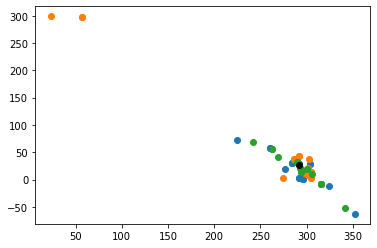

In [78]:
plt.scatter(total_TUR_points[:,0],total_TUR_points[:,1])
plt.scatter(total_BRR_points[:,0],total_BRR_points[:,1])
plt.scatter(total_SEL_points[:,0],total_SEL_points[:,1])

overlap_for_convex = np.row_stack([total_TUR_points,total_BRR_points, total_SEL_points])


plt.scatter(292,26,color="black",label='GPS Detection')

In [79]:
convex_of_sol = ConvexHull(overlap_for_convex)

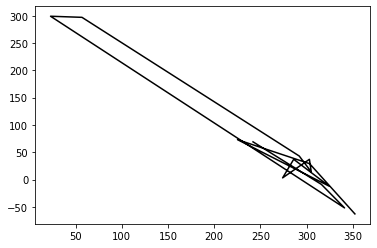

In [94]:
plt.plot(overlap_for_convex[convex_of_sol.vertices,0],overlap_for_convex[convex_of_sol.vertices,1],c='black')

In [96]:
convex_of_sol.volume

780555.3026909177

In [98]:
#0.0007 Cubic Kilometer 

0.00078055530269091773742**(1/3)

#which is like a 92 meter by 92 meter by 92 meter box

0.09207348031158881

In [101]:
780555.3026909177/778688

1.0023980113869968

In [54]:
#plt.triplot(points_for_tri_TUR[indices_TUR[36]][:,0],points_for_tri_TUR[indices_TUR[36]][:,1])
#plt.triplot(points_for_tri_BRR[indices_BRR[6]][:,0],points_for_tri_BRR[indices_BRR[6]][:,1])
#plt.triplot(points_for_tri_SEL[indices_SEL[95]][:,0],points_for_tri_SEL[indices_SEL[95]][:,1])

#plt.triplot(points_for_tri_TUR[indices_TUR[36]][:,0],points_for_tri_TUR[indices_TUR[36]][:,1])
#plt.triplot(points_for_tri_BRR[indices_BRR[6]][:,0],points_for_tri_BRR[indices_BRR[6]][:,1])
#plt.triplot(points_for_tri_SEL[indices_SEL[192]][:,0],points_for_tri_SEL[indices_SEL[192]][:,1])

#plt.triplot(points_for_tri_TUR[indices_TUR[36]][:,0],points_for_tri_TUR[indices_TUR[36]][:,1])
#plt.triplot(points_for_tri_BRR[indices_BRR[106]][:,0],points_for_tri_BRR[indices_BRR[106]][:,1])
#plt.triplot(points_for_tri_SEL[indices_SEL[192]][:,0],points_for_tri_SEL[indices_SEL[192]][:,1])


#plt.scatter(292,26,color="black",label='GPS Detection')

#points_for_tri_BRR[indices_BRR[4]]
#points_for_tri_SEL[indices_SEL[172]]


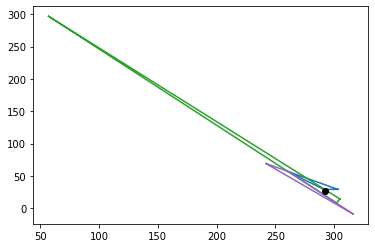

In [53]:
plt.triplot(points_for_tri_TUR[indices_TUR[45]][:,0],points_for_tri_TUR[indices_TUR[45]][:,1])
plt.triplot(points_for_tri_BRR[indices_BRR[51]][:,0],points_for_tri_BRR[indices_BRR[51]][:,1])
plt.triplot(points_for_tri_SEL[indices_SEL[7]][:,0],points_for_tri_SEL[indices_SEL[7]][:,1])


plt.scatter(292,26,color="black",label='GPS Detection')